# 用户新增预测挑战赛

## 赛题主页
- https://challenge.xfyun.cn/topic/info?type=subscriber-addition-prediction&ch=ymfk4uU

In [19]:
from IPython.display import IFrame
IFrame("https://datawhaler.feishu.cn/docx/HBIHd7ugzoOsMqx0LEncR1lJnCf",
       width=900, height=400, frameborder="no", border="0")

## 跑通Baseline

### 1. 导入需要用的相关库

In [28]:
import pandas as pd # 导入pandas库
import numpy as np # 导入numpy库

from sklearn.tree import DecisionTreeClassifier

### 2. 读取训练集和数据集并了解数据

In [3]:
train_data = pd.read_csv("./用户新增预测挑战赛公开数据/train.csv")
test_data = pd.read_csv("./用户新增预测挑战赛公开数据/test.csv")

print(train_data.head)
train_data.shape

# train_data['common_ts'] = pd.to_datetime()

<bound method NDFrame.head of           uuid  eid                          udmap      common_ts  x1  x2  x3  \
0            0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41   
1            1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   
2            2    8                        unknown  1689407393040   4   0  41   
3            3   11                        unknown  1689467815688   1   3  41   
4            4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   
...        ...  ...                            ...            ...  ..  ..  ..   
620351  620351    2      {"key4":"14","key5":"14"}  1688990850527   4   0  41   
620352  620352    8                        unknown  1689490302305   4   0  41   
620353  620353   41    {"key1":"274","key2":"446"}  1688892078584   0   2  41   
620354  620354   26  {"key3":"67804","key2":"650"}  1689652960171   4   0  41   
620355  620355   41   {"key1":"1398","key2":"289"}  1689235398023   2   2  41  

(620356, 13)

### 3. 将'udmap'列进行 One-Hot编码

In [20]:
# - 使用One-Hot编码处理udmap列

# 将 'udmap' 列进行 One-Hot 编码 
# 数据样例：
#                    udmap  key1  key2  key3  key4  key5  key6  key7  key8  key9
# 0           {'key1': 2}     2     0     0     0     0     0     0     0     0
# 1           {'key2': 1}     0     1     0     0     0     0     0     0     0
# 2  {'key1': 3, 'key2': 2}   3     2     0     0     0     0     0     0     0

# 在 python 中, 形如 {'key1': 3, 'key2': 2} 格式的为字典类型对象, 通过key-value键值对的方式存储


# - 定义一个函数，该函数接收一个参数d
def udmap_onehot(d):
    v = np.zeros(9)     # 创建一个长度为9的全零向量
    
    if d == 'unknown':  
        return v        # 如果字典d的值 为 'unknown',则返回全零向量v
        
    d = eval(d)    # udmap实际是以字符的形式存储, 所以处理时需要先用eval 函数将'udmap' 解析为字典    
    
    for i in range(1,10):      # 遍历 'key1' 到 'key9'，注意，这里不包括10
        if 'key' + str(i) in d:  # 如果当前键存在于字典中
            v[i -1] = d['key' + str(i)] #将字典中的值存储在对应的索引值
    return v #返回向量v


In [5]:
'''
    这段代码的作用是将train_data和test_data中的'udmap'列应用udmap_onethot函数，并将结果转换为pandas.DataFrame对象。
    然后，为train_udmap_df和test_udmap_df设置列名，列名由字符串'key'加上1到9的数字组成。
'''
# 1.'udmap'列应用udmap_onethot函数
    ## np.stack() 用过垂直堆叠生成数组
train_udmap_df = pd.DataFrame(np.vstack(train_data['udmap'].apply(udmap_onehot)))


test_udmap_df = pd.DataFrame(np.vstack(test_data['udmap'].apply(udmap_onehot)))

# 2.设置列名
train_udmap_df.columns = ['key' + str(i) for i in range(1,10)] 
test_udmap_df.columns = ['key' + str(i) for i in range(1,10)]  # 设置列名

print(train_udmap_df.head)
print(test_udmap_df.head)

<bound method NDFrame.head of           key1   key2     key3  key4  key5  key6  key7  key8  key9
0          0.0  650.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
1          0.0  484.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
2          0.0    0.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
3          0.0    0.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
4          0.0  650.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
...        ...    ...      ...   ...   ...   ...   ...   ...   ...
620351     0.0    0.0      0.0  14.0  14.0   0.0   0.0   0.0   0.0
620352     0.0    0.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
620353   274.0  446.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0
620354     0.0  650.0  67804.0   0.0   0.0   0.0   0.0   0.0   0.0
620355  1398.0  289.0      0.0   0.0   0.0   0.0   0.0   0.0   0.0

[620356 rows x 9 columns]>
<bound method NDFrame.head of         key1   key2     key3  key4  key5  key6  key7  key8  key9
0        0.0    0.0      0.0   0.0   0.0   

- **pandas.concat()**
> 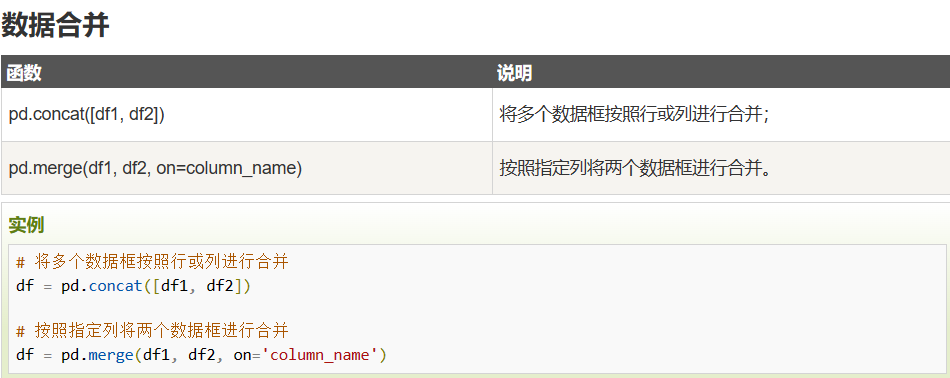)

下列代码的作用是将train_udmap_df添加到train_data和test_data中。
通过使用pd.concat函数，将train_udmap_df沿着列的方向（axis=1）与原始数据进行合并。
这样，train_data和test_data就会包含经过udmap_onethot处理后的数据    13+9=22

In [6]:
train_data = pd.concat([train_data,train_udmap_df], axis=1) 
test_data = pd.concat([test_data,train_udmap_df], axis=1)

print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of           uuid  eid                          udmap      common_ts  x1  x2  x3  \
0            0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41   
1            1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   
2            2    8                        unknown  1689407393040   4   0  41   
3            3   11                        unknown  1689467815688   1   3  41   
4            4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   
...        ...  ...                            ...            ...  ..  ..  ..   
620351  620351    2      {"key4":"14","key5":"14"}  1688990850527   4   0  41   
620352  620352    8                        unknown  1689490302305   4   0  41   
620353  620353   41    {"key1":"274","key2":"446"}  1688892078584   0   2  41   
620354  620354   26  {"key3":"67804","key2":"650"}  1689652960171   4   0  41   
620355  620355   41   {"key1":"1398","key2":"289"}  1689235398023   2   2  41  

### 4. 编码 udmap 是否为空
- 使用比较运算符将每个样本的'udmap'列与字符串'unknown'进行比较，返回一个布尔值的Series
- 使用 astype(int) 将布尔值转换成整数（0或1），以便于后续的数值计算和分析

In [7]:
train_data['udmap_isunknown'] = (train_data['udmap'] == 'unknown').astype(int)
test_data['udmap_isunknown'] = (test_data['udmap'] == 'unknown').astype(int)

print(train_data.head)
print(test_data.head)

- **astype():**
> 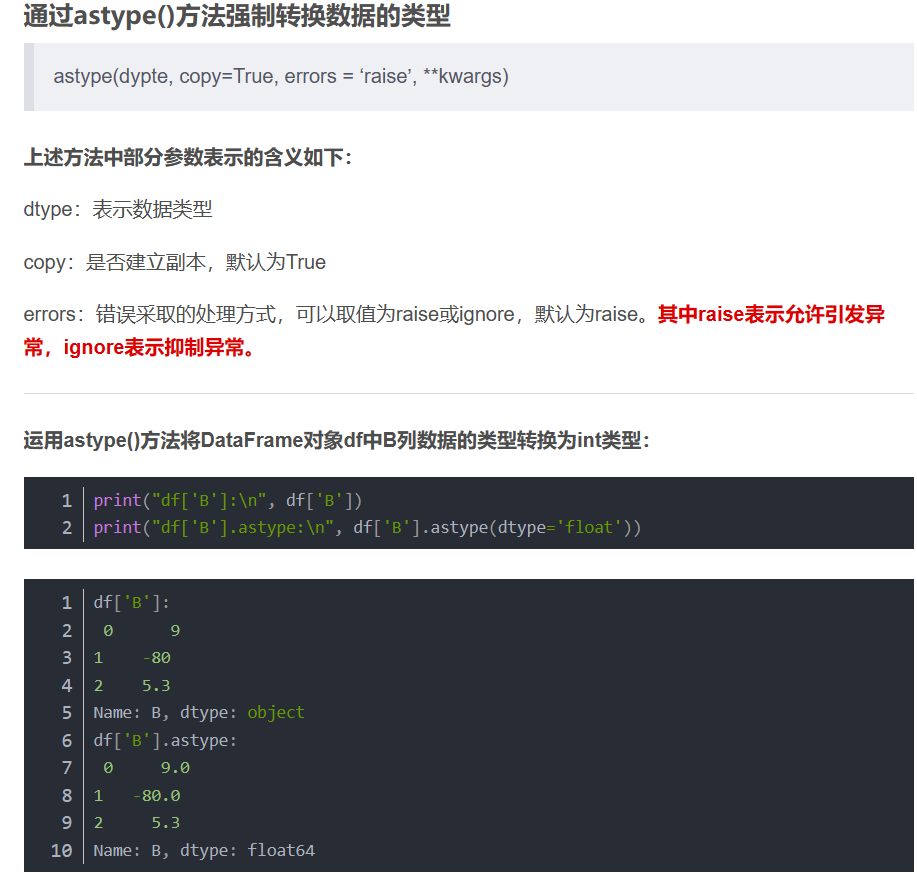

### 5. 提取 eid 的频次特征
- 使用map()将每个样本的eid映射到训练数据中eid的频次计算
- train_data['eid'].value_counts() 返回每个eid出现的频次计数

In [8]:
'''
    eid为用户行为
    这段代码的作用是为train_data和test_data添加一个名为eid_freq的新列，
    该列包含了每个eid在训练数据中出现的频率
'''

train_data['eid_freq'] = train_data['eid'].map(train_data['eid'].value_counts())
test_data['eid_freq'] = test_data['eid'].map(train_data['eid'].value_counts())

print(train_data.head)
print(test_data.head)

- **value_counts( )**

> 在pandas中，value_counts常用于数据表的计数及排序，它可以用来查看数据表中，指定列里有多少个**不同的数据值**，并计算每个**不同值有在该列中的个数**，同时还能根据需要进行排序。

- **map()**
> 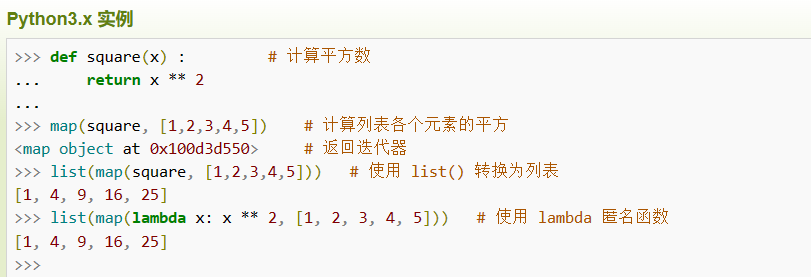

### 6. 提取eid 的标签特征
- 使用 groupby()方法按照eid进行分组，然后计算每个eid分组的目标值均值
- train_data.groupby('eid')['target'].mean() 返回每个eid分组的目标值均值

In [24]:
train_data['eid_mean'] = train_data['eid'].map(train_data.groupby('eid')['target'].mean())
test_data['eid_mean'] = test_data['eid'].map(train_data.groupby('eid')['target'].mean())

print(train_data.head)
print(test_data.head)

<bound method NDFrame.head of           uuid  eid                          udmap               common_ts  \
0            0   26  {"key3":"67804","key2":"650"} 2023-07-18 09:44:28.244   
1            1   26  {"key3":"67804","key2":"484"} 2023-07-11 13:42:21.469   
2            2    8                        unknown 2023-07-15 07:49:53.040   
3            3   11                        unknown 2023-07-16 00:36:55.688   
4            4   26  {"key3":"67804","key2":"650"} 2023-07-16 07:15:51.442   
...        ...  ...                            ...                     ...   
620351  620351    2      {"key4":"14","key5":"14"} 2023-07-10 12:07:30.527   
620352  620352    8                        unknown 2023-07-16 06:51:42.305   
620353  620353   41    {"key1":"274","key2":"446"} 2023-07-09 08:41:18.584   
620354  620354   26  {"key3":"67804","key2":"650"} 2023-07-18 04:02:40.171   
620355  620355   41   {"key1":"1398","key2":"289"} 2023-07-13 08:03:18.023   

        x1  x2  x3   x4   x5  x6 

- **groupby()**
> 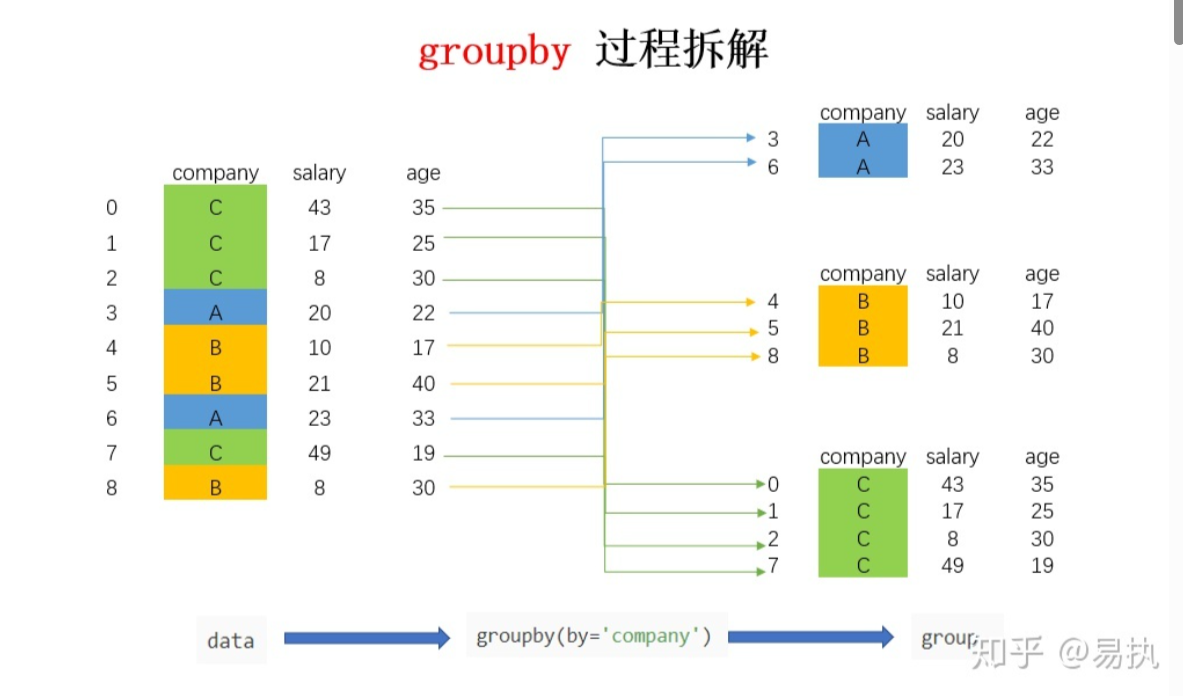

### 7. 提取时间戳
 - 使用 pd.to_datetime() 函数将时间戳列转换为 datetime 类型
 - 样例：1678932546000->2023-03-15 15:14:16
 - 注: 需要注意时间戳的长度, 如果是13位则unit 为 毫秒, 如果是10位则为 秒, 这是转时间戳时容易踩的坑

In [23]:
train_data['common_ts'] = pd.to_datetime(train_data['common_ts'], unit = 'ms')
test_data['common_ts'] = pd.to_datetime(test_data['common_ts'],unit = 'ms')
print('train_data:\n', train_data.head)
print('*'*80)
print('test_data:\n', test_data.head)

train_data:
 <bound method NDFrame.head of           uuid  eid                          udmap               common_ts  \
0            0   26  {"key3":"67804","key2":"650"} 2023-07-18 09:44:28.244   
1            1   26  {"key3":"67804","key2":"484"} 2023-07-11 13:42:21.469   
2            2    8                        unknown 2023-07-15 07:49:53.040   
3            3   11                        unknown 2023-07-16 00:36:55.688   
4            4   26  {"key3":"67804","key2":"650"} 2023-07-16 07:15:51.442   
...        ...  ...                            ...                     ...   
620351  620351    2      {"key4":"14","key5":"14"} 2023-07-10 12:07:30.527   
620352  620352    8                        unknown 2023-07-16 06:51:42.305   
620353  620353   41    {"key1":"274","key2":"446"} 2023-07-09 08:41:18.584   
620354  620354   26  {"key3":"67804","key2":"650"} 2023-07-18 04:02:40.171   
620355  620355   41   {"key1":"1398","key2":"289"} 2023-07-13 08:03:18.023   

        x1  x2  x3  

- 使用 dt.hour 属性从 datetime 列中提取小时信息，并将提取的小时信息存储在新的列 'common_ts_hour'

In [22]:
train_data['common_ts_hour'] = train_data['common_ts'].dt.hour
test_data['common_ts_hour'] = test_data['common_ts'].dt.hour

### 8. 加载决策树模型进行训练（直接使用sklearn中导入的包进行模型建立）